###  Figure 5B
<p> The following code will generate an X-Y plot to explore the relationship of the mean differences between N2 and mutant strains (PR678, CX10 and PR678:CX10 double) relative to the null reference conditions (DMSO:DMSO, DMSO:H2O) </p>

#### 1. Importing packages and reading in the data file to generate the plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_strains =  pd.read_csv('C:/Users/Emily/Documents/NP_manuscript/data/all_strains_wide.csv', index_col=0)

#### 2. Categorizing the compound data
<p> We want to be able to identify the reference compounds in the plot. The following code will add a 1 if to the 'Reference' to ID reference compounds and a 0 will be entered for all other compounds.</p>

In [4]:
refs=['Isoamyl alcohol', 'Diacetyl', 'DMSO', 'H2O', '1-octanol', '2-nonanone']
def add_ref(row):
    if row['test'] in refs:
        v = 1
    else:
        v=0
    return v

all_strains['Reference'] = (all_strains.apply(lambda row: add_ref(row), axis=1))


#### 3. Generating the plots

In [12]:
# Creating subsets of the data based on the control condition makes it easier to generate the plots
dmso_dat = all_strains.loc[all_strains['control']=='DMSO']
h2o_dat = all_strains.loc[all_strains['control']=='H2O']

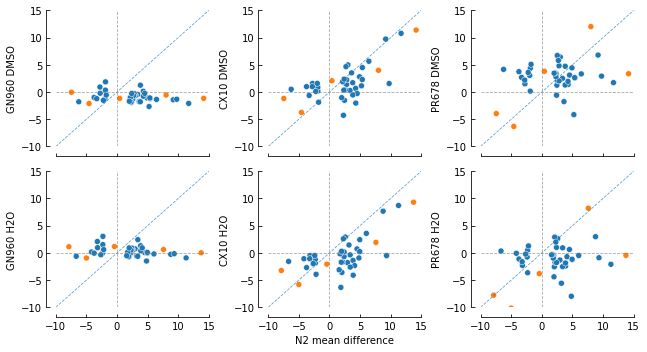

In [11]:
fig, axes = plt.subplots(figsize=(9,5), nrows=2, ncols=3,  sharex=True )

for ax in axes.ravel():
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle='--', linewidth= .8, alpha = .7)
    ax.set_xlim(-10,15)
    ax.set_ylim(-10, 15)
    ax.axvline(x=0, linestyle='--', color='gray', linewidth= .8, alpha = .7)
    ax.axhline(y=0, linestyle='--', color='gray', linewidth= .8, alpha = .7)
    ax.tick_params(axis="both", direction="in")
    #ax.set_aspect('equal')


sns.scatterplot(x= "N2difference", y= "GN960difference",
                hue='Reference', data=dmso_dat, ax=axes[0,0], legend=False)
axes[0,0].set_xlabel('N2 mean difference')
axes[0,0].set_ylabel('GN960 DMSO') 
    
sns.scatterplot(x="N2difference", y= "CX10difference", 
                hue='Reference', data=dmso_dat, ax=axes[0,1], legend=False)
axes[0,1].set_xlabel('N2 mean difference')
axes[0,1].set_ylabel('CX10 DMSO')  

sns.scatterplot(x="N2difference", y= "PR678difference", 
                hue='Reference', data=dmso_dat, ax=axes[0,2], legend=False)
axes[0,2].set_xlabel('N2 mean difference')
axes[0,2].set_ylabel('PR678 DMSO')


sns.scatterplot(x="N2difference", y="GN960difference", 
                hue='Reference', data=h2o_dat, ax=axes[1,0], legend=False)
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('GN960 H2O')

sns.scatterplot(x="N2difference", y="CX10difference", 
                hue='Reference', data=h2o_dat, ax = axes[1,1], legend=False)
axes[1,1].set_xlabel('N2 mean difference')
axes[1,1].set_ylabel('CX10 H2O')

sns.scatterplot(x="N2difference", y="PR678difference", 
                hue='Reference', data=h2o_dat, ax = axes[1,2], legend=False)
axes[1,2].set_xlabel('')
axes[1,2].set_ylabel('PR678 H2O')

sns.despine(offset=10)
plt.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/X_Y_meandiff.svg')